In [1]:
%matplotlib widget
import obspy
from obspy.signal.trigger import classic_sta_lta, recursive_sta_lta, aic_simple
from obspy.signal.trigger import plot_trigger
from obspy.signal.trigger import coincidence_trigger
from obspy.signal.cross_correlation import correlation_detector
from obspy.signal import PPSD
from obspy import read_inventory
from obspy.realtime.signal import kurtosis




from hydrophone_data_processing import load, useful_variables, plotting, signal_processing
import obspy.signal.trigger as trigger
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plot_working
import event_processing
import loading_stream_function

import matplotlib.ticker as ticker
from datetime import datetime
from datetime import timedelta

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
chan = 'GHZ'
#statlist = [ 'A01' ,'A03' , 'A05' , 'A07' , 'A09' , 'A11' , 'A13' , 'A15' , 'A17' , 'A19' ]
statlist = [ 'A01' ,'A02' , 'A03' , 'A04' , 'A05' , 'A06' , 'A07' , 'A08' , 'A09', 'A10' , 'A11', 'A13', 'A14', 'A19']#, 'A16', 'A17', 'A18', 'A19' ]
#statlist = [ 'B01' ,'B02' , 'B03' , 'B04' , 'B06' , 'B07' , 'B08' , 'B09','B10' , 'B11', 'B12', 'B13' , 'B19' , 'B20']#,'B14','B15','B16','B17','B18','B19', 'B20' ]

day = 15
hr = 15
start_time = obspy.UTCDateTime('2020-1-' + str(day) + 'T00:00:00')+hr*3600
end_time = obspy.UTCDateTime('2020-1-' + str(day) + 'T00:00:00')+(hr+1)*3600
stream = obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" +statlist[0]+ "/*.." + chan +".2020.0" +str(day))


In [4]:
for s in statlist[1:]:
    
    stream += obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" + s + "/*.." + chan + ".2020.0" + str(day))


In [5]:
data = stream.slice(starttime=start_time,endtime=end_time) #look into trim()
#print(data)
print(start_time, end_time)

2020-01-15T15:00:00.000000Z 2020-01-15T16:00:00.000000Z


In [ ]:
data

In [6]:
#data = data.decimate(2)
data1 = data.copy()
#stream_filt = data1.filter('highpass', corners=4, freq=80, zerophase=False)

In [7]:
stream_filt = data.filter('highpass', corners=4, freq=80, zerophase=False)
stream_2 = stream_filt.copy()

events = coincidence_trigger("classicstalta", 5, 0.8, stream_2, 3, sta=0.02, lta=0.2)




#events = coincidence_trigger("classicstalta", 4, 0.5, stream_2, 3, sta=0.08, lta=0.5)
events = pd.DataFrame(events)

In [8]:
event_id = 510
event_meta = events.iloc[event_id]
time = events.time[510]-1

In [ ]:
events

In [20]:
TIME = events.time[509]
print(TIME)

2020-01-15T15:21:37.239000Z


In [ ]:
time = events.time[510]-1

In [ ]:
#gw_test = event_processing.get_waveforms(data, event_meta.time)

In [ ]:
time + 0.5

In [ ]:
g_wind = event_processing.get_event_window_raw(data,time)

In [10]:
g_wind1 = event_processing.get_event_window_raw(data1,TIME)

In [ ]:
g_wind_df = pd.DataFrame(g_wind1)

In [ ]:
g_wind_df.to_csv('event_trace_example.csv')  

In [ ]:
g_wind_df

In [ ]:
g_wind_df_A01 = pd.DataFrame(g_wind1[0].data)

In [ ]:
g_wind_df.to_csv('event_trace_example2')  

In [ ]:
g_wind_df_A01

In [ ]:
col1 = g_wind_df_A01[g_wind_df_A01.columns[0]]

In [ ]:
col1.to_csv('colssssssss.csv')

In [ ]:
fig, ax = plt.subplots()
ax.plot(g_wind1[0].times('matplotlib'), g_wind1[0].data)
ax.xaxis.set_major_formatter(PrecisionDateFormatter("%H:%M:%S.{ms}"))

In [ ]:
fig, ax = plt.subplots(1, figsize=(17, 10), sharex=True, sharey=False)

#for i in np.arange(0, len(data), 1):
    # plot waveform
#ax.plot(T_in, data_z_filtered_cp4070[0].data, color='black')
#ax.plot(T_in, data_z_filtered_cp70200[0].data, color='blue')
ax.plot(g_wind[0].times('matplotlib'), g_wind[0].data, 'green')
ax.xaxis.set_major_formatter(PrecisionDateFormatter("%H:%M:%S.{ms}"))

In [ ]:
from obspy.imaging.spectrogram import spectrogram
spectrogram(g_wind[0].data, samp_rate=500, cmap='nipy_spectral')


In [ ]:
import numpy as np
from copy import copy, deepcopy
from obspy.core import Trace


def do_fft(signal, delta):
    """Compute the complex Fourier transform of a signal."""
    npts = len(signal)
    print(npts)
    if not npts % 2:
        npts -= 1

    fft = np.fft.rfft(signal, n=npts) * delta
    print(fft.size)
    fftfreq = np.fft.fftfreq(len(signal), d=delta)
    #print(fftfreq)
    print(len(fftfreq))
    fftfreq = fftfreq[0:fft.size]
    print(len(fftfreq))
    
    return fft, fftfreq



def do_spectrum(trace):
    """Compute the spectrum of an ObsPy Trace object."""
    signal = trace.data
    delta = trace.stats.delta
    amp, freq = do_fft(signal, delta)
    return amp, freq


In [ ]:
amp, freq = do_spectrum(g_wind[0])

In [ ]:
amp1, freq1 = do_spectrum(g_wind1[0])

In [ ]:
amp

In [ ]:
#g_wind1[0].data

In [ ]:
plt.plot(freq1, abs(amp1), 'pink')
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Amplitude')
plt.show()

In [ ]:
plt.plot(freq, abs(amp), 'blue')
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Amplitude')
plt.show()

In [ ]:
plt.semilogy(freq, abs(amp**2), 'blue')
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Amplitude')
plt.show()

In [ ]:
plt.semilogy(freq1, abs(amp1**2), 'green')
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Amplitude')
plt.show()

In [ ]:
milti_data = g_wind1[0]
milti_data.shape[0]

In [11]:
N = len(g_wind1[0].data)
NW = 3/2
k = 4
data = g_wind1[0].data

In [12]:
dt=g_wind1[0].stats.delta
print(dt)

0.001


In [14]:
class PrecisionDateFormatter(ticker.Formatter):
    """
    Extend the `matplotlib.ticker.Formatter` class to allow for millisecond
    precision when formatting a tick (in days since the epoch) with a
    `~datetime.datetime.strftime` format string.

    """

    def __init__(self, fmt, precision=3, tz=None):
        """
        Parameters
        ----------
        fmt : str
            `~datetime.datetime.strftime` format string.
        """
        from matplotlib.dates import num2date
        if tz is None:
            from matplotlib.dates import _get_rc_timezone
            tz = _get_rc_timezone()
        self.num2date = num2date
        self.fmt = fmt
        self.tz = tz
        self.precision = precision

    def __call__(self, x, pos=0):
        if x == 0:
            raise ValueError("DateFormatter found a value of x=0, which is "
                             "an illegal date; this usually occurs because "
                             "you have not informed the axis that it is "
                             "plotting dates, e.g., with ax.xaxis_date()")

        dt = self.num2date(x, self.tz)
        ms = dt.strftime("%f")[:self.precision]

        return dt.strftime(self.fmt).format(ms=ms)

    def set_tzinfo(self, tz):
        self.tz = tz

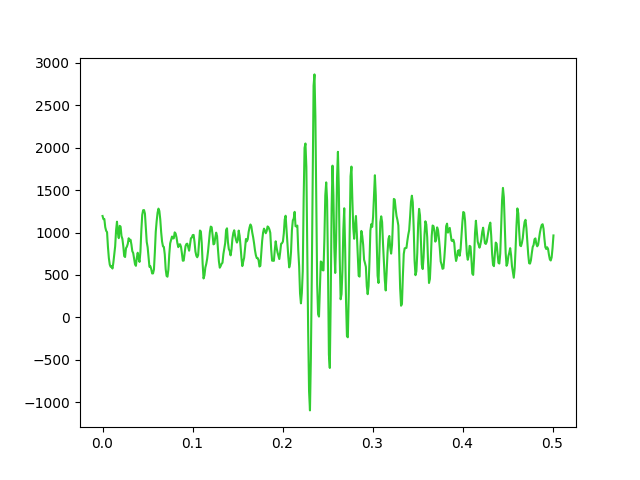

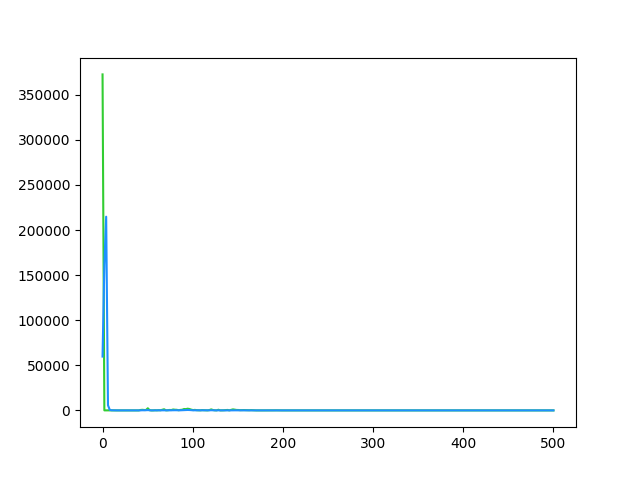

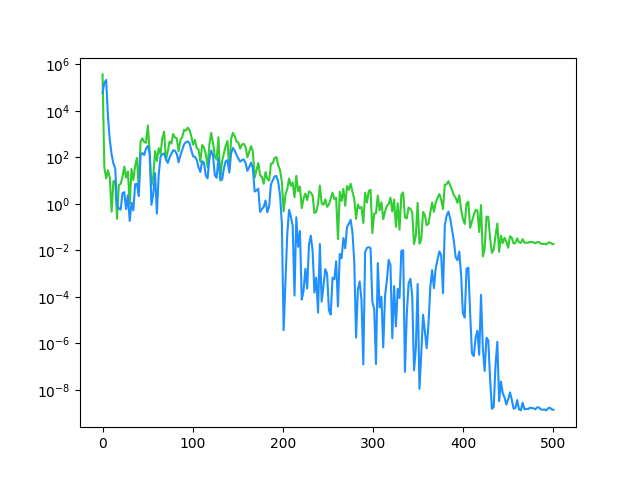

In [17]:
from spectrum import *

x = np.linspace(0.0, N*dt, N)
y = data

plt.figure()
plt.plot(x,y, 'limegreen')




# classical FFT
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*dt), N//2)

# The multitapered method
NW=1.0
k=8
[tapers, eigen] = dpss(N, NW, k)
Sk_complex, weights, eigenvalues=pmtm(y, e=eigen, v=tapers, NFFT=N, show=False)

Sk = abs(Sk_complex)**2
Sk = np.mean(Sk * np.transpose(weights), axis=0) * dt

# ploting both results
plt.figure()
plt.plot(xf,abs(yf[0:N//2])**2 / N * dt, 'limegreen')
plt.plot(xf,Sk[0:N//2], 'dodgerblue')

# ploting both results in log scale
plt.figure()
plt.semilogy(xf, abs(yf[0:N // 2]) ** 2 / N * dt, 'limegreen')
plt.semilogy(xf, Sk[0:N // 2], 'dodgerblue')

# comparing total power
#print(np.sum(abs(yf[0:N//2])**2 / N * dt), np.sum(Sk[0:N//2]))

In [18]:
fig.clf()

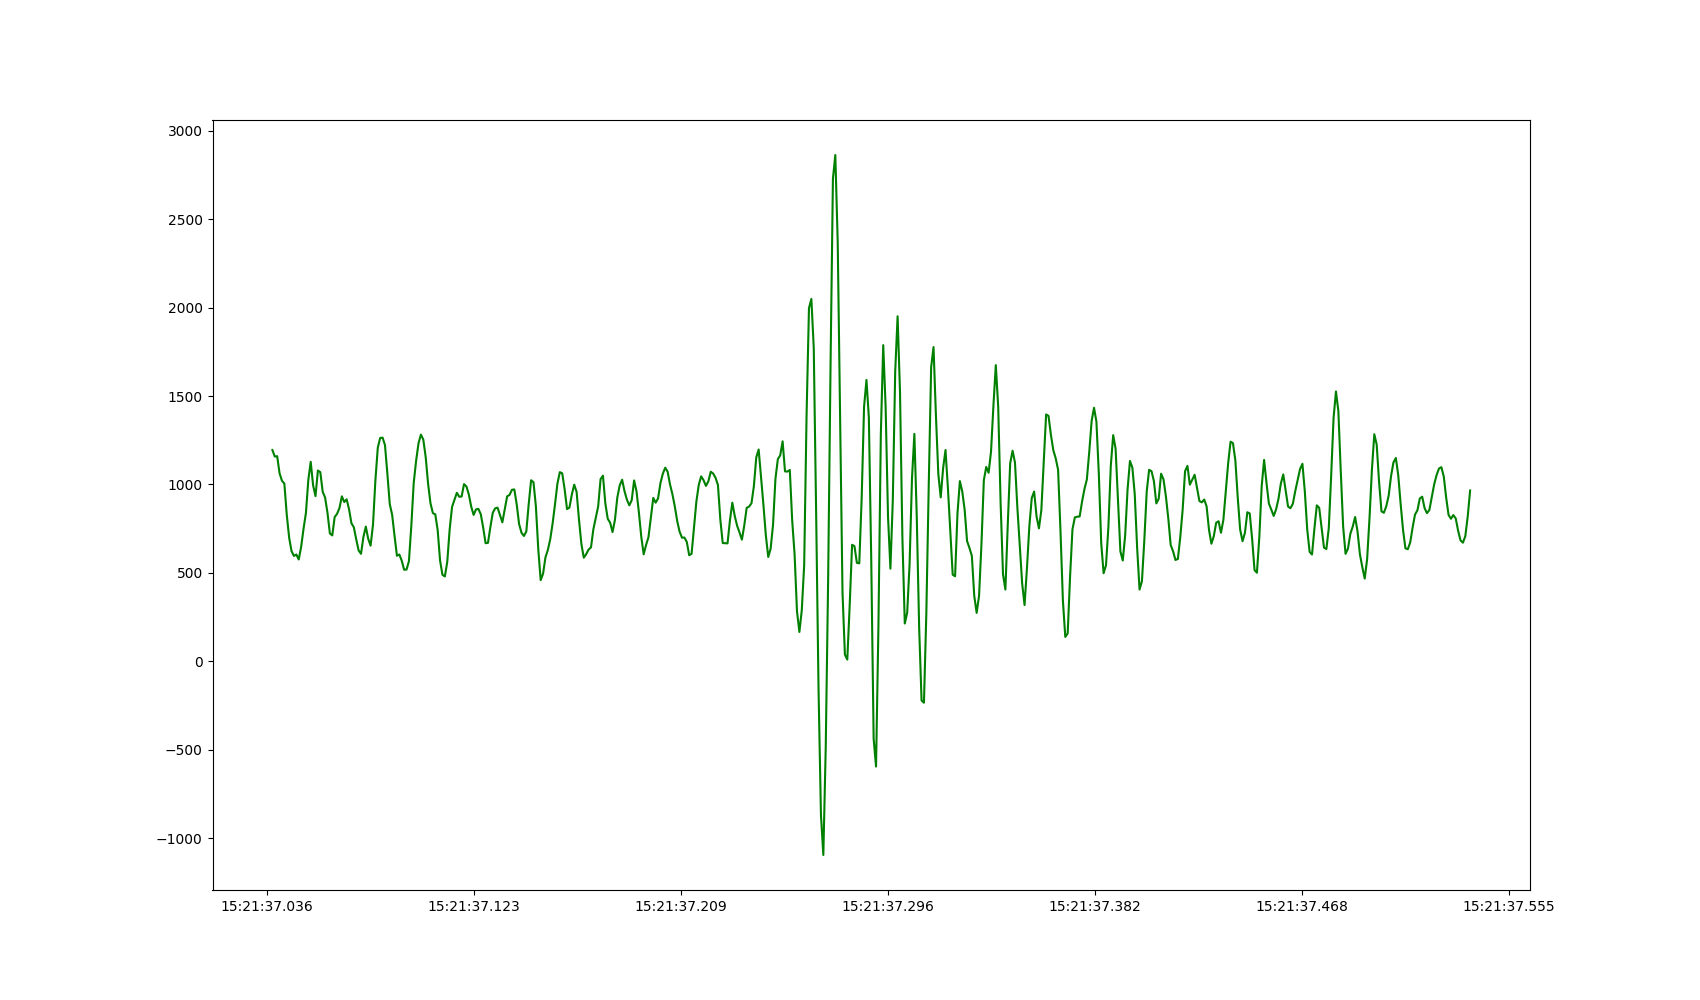

In [19]:
fig, ax = plt.subplots(1, figsize=(17, 10), sharex=True, sharey=False)
ax.plot(g_wind1[0].times('matplotlib'), g_wind1[0].data, 'green')
ax.xaxis.set_major_formatter(PrecisionDateFormatter("%H:%M:%S.{ms}"))

In [ ]:
from obspy.signal.tf_misfit import cwt
f_min= 1
f_max=500
data = g_wind1[0].data
#data2 = data1.copy()
dt = g_wind1[0].stats.delta
npts = g_wind1[0].stats.npts
t = np.linspace(0, dt*npts, npts)
scalogram = cwt(data, dt,5, f_min, f_max)
x, y = np.meshgrid(t, np.logspace(np.log10(f_min), np.log10(f_max), scalogram.shape[0]))
print(np.shape(x),np.shape(y))



fig, ax = plt.subplots()
ax.pcolormesh(x, y, np.abs(scalogram), cmap= 'inferno')
ax.set_yscale('log')
plt.yticks(np.arange(100, 10000, 1000.0))
plt.ylim(f_min, f_max)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

In [ ]:
data_test = g_wind1[0].data

In [ ]:
data_test.shape[-1]

In [ ]:
sr = g_wind1[0].stats.sampling_rate

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.stats.distributions as dist

import nitime.algorithms as tsa
import nitime.utils as utils
from nitime.viz import winspect
from nitime.viz import plot_spectral_estimate

In [ ]:
def dB(x, out=None):
    if out is None:
        return 10 * np.log10(x)
    else:
        np.log10(x, out)
        np.multiply(out, 10, out)

In [ ]:
f, psd_mt, nu = tsa.multi_taper_psd(
    g_wind1[0].data, Fs = sr, NW=3/2 ,adaptive=False, jackknife=False
    )
dB(psd_mt, psd_mt)

In [ ]:
freqs, d_psd = tsa.periodogram(g_wind1[0].data)
dB(d_psd, d_psd)

In [ ]:
len(freqs)

In [ ]:
Kmax = nu[0] / 2
ln2db = dB(np.e)

In [ ]:
p975 = dist.chi2.ppf(.975, 2 * Kmax)
p025 = dist.chi2.ppf(.025, 2 * Kmax)

l1 = ln2db * np.log(2 * Kmax / p975)
l2 = ln2db * np.log(2 * Kmax / p025)

hyp_limits = (psd_mt + l1, psd_mt + l2)

#plot_spectral_estimate(freqs, psd, (psd_mt,), hyp_limits,elabels=(r"MT with :math:`\chi^{2}` 95% interval",))

In [ ]:
f

In [ ]:
plt.figure()
plt.plot(f,psd_mt, 'limegreen')
#plt.plot(xf,Sk[0:N//2], 'dodgerblue')

In [ ]:
plt.figure()
plt.semilogy(f,psd_mt, 'dodgerblue')

In [ ]:
def get_power_freq(N, NW, k, data):
#    data = zero_pad(data, N, k)
#    data = np.reshape(data, (k, N))
    w, eigens = spectrum.dpss(N, NW, k)
    sk, weights, eigenvalues = spectrum.pmtm(data, e=eigens, v=w, method='eigen')
    power = 10*np.log10(np.abs(np.mean(sk * sk.conj(), axis=0)))
    Tlength = 1000/(data.shape[0])
    freq = np.ones(power.shape) * Tlength
    freq = freq.cumsum()
    return freq, power

In [ ]:
import spectrum

In [ ]:
N = len(g_wind1[0].data)
NW = 3/2
k = 4
data = g_wind1[0].data
fq, pwr = get_power_freq(N, NW, k, data)

In [ ]:
1024*1.109

In [ ]:
g_wind1[0].stats.delta

In [ ]:
power2 = np.abs(np.mean(sk * sk.conj(), axis=0))

In [ ]:
Tlength = 500/(data2.shape[0])
freq = np.ones(power2.shape) * Tlength
freq1 = freq.cumsum()

In [ ]:
plt.semilogy(freq1,power2, 'green')
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Amplitude')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.semilogy(freq1, power2)
ax.set_xlim(0, 300)

In [ ]:
N1 = len(g_wind1[0].data)
NW1 = 3/2
k1 = 4
data2 = g_wind1[0].data

In [ ]:
tapers, eigens = spectrum.dpss(N1, NW1, k1)
sk, weights, eigenvalues = spectrum.pmtm(data2, e=eigens, v=tapers, method='eigen', show=True)
#power = 10*np.log10(np.abs(np.mean(sk * sk.conj(), axis=0)))

In [ ]:
weights

In [ ]:
np.shape(sk)

In [ ]:
power

In [ ]:
np.shape(weights)

In [ ]:
g_wind1[0].data

In [ ]:
fq, pwr = get_power_freq(N, NW, k, data)

In [ ]:
power.shape

In [ ]:
#pwr

In [ ]:
fig, ax = plt.subplots(1, figsize=(17, 10), sharex=True, sharey=False)
ax.plot(fq, pwr, 'limegreen')
#ax.set_ylabel('Power, dB $(Pa^2 Hz^{-1})$', fontsize=25)
#ax.set_xlabel('Frequency, Hz', fontsize=25)

In [ ]:
class PrecisionDateFormatter(ticker.Formatter):
    """
    Extend the `matplotlib.ticker.Formatter` class to allow for millisecond
    precision when formatting a tick (in days since the epoch) with a
    `~datetime.datetime.strftime` format string.

    """

    def __init__(self, fmt, precision=3, tz=None):
        """
        Parameters
        ----------
        fmt : str
            `~datetime.datetime.strftime` format string.
        """
        from matplotlib.dates import num2date
        if tz is None:
            from matplotlib.dates import _get_rc_timezone
            tz = _get_rc_timezone()
        self.num2date = num2date
        self.fmt = fmt
        self.tz = tz
        self.precision = precision

    def __call__(self, x, pos=0):
        if x == 0:
            raise ValueError("DateFormatter found a value of x=0, which is "
                             "an illegal date; this usually occurs because "
                             "you have not informed the axis that it is "
                             "plotting dates, e.g., with ax.xaxis_date()")

        dt = self.num2date(x, self.tz)
        ms = dt.strftime("%f")[:self.precision]

        return dt.strftime(self.fmt).format(ms=ms)

    def set_tzinfo(self, tz):
        self.tz = tz

In [ ]:
fig, ax = plt.subplots(1, figsize=(17, 10), sharex=True, sharey=False)

#for i in np.arange(0, len(data), 1):
    # plot waveform
#ax.plot(T_in, data_z_filtered_cp4070[0].data, color='black')
#ax.plot(T_in, data_z_filtered_cp70200[0].data, color='blue')
ax.plot(g_wind[0].times('matplotlib'), g_wind[0].data, 'green')
    #ax[i].plot(times_mat[i], waveforms_hp[i], color='blue')
#ax.plot(data[0].times('matplotlib'), stream_bp1[0].data, color='green')
#ax.plot(data[0].times('matplotlib'), stream_bp2[0].data, color='blue')
#ax.plot(data[0].times('matplotlib'), stream_bp3[0].data, color='orange')

#ax.plot(data[0].times('matplotlib'), stream_bp4[0].data, color='red')
#ax.plot(data[0].times('matplotlib'), stream_bp5[0].data, color='violet')
#ax.plot(data[0].times('matplotlib'), stream_bp6[0].data, color='dodgerblue')
#ax.plot(data[0].times('matplotlib'), stream_bp7[0].data, color='gray')
#plt.axvline(x = p_pick_plt, color = 'b', label = 'axvline - full height')
#plt.axvline(x = T_in_utcd[0]+ p_pick2, color = 'r', label = 'axvline - full height')
#ax.plot(T_in_utcd[0] + p_pick, 5000, color='darkred')
ax.xaxis.set_major_formatter(PrecisionDateFormatter("%H:%M:%S.{ms}"))

In [ ]:
g_wind[0]

In [ ]:
#freq = ds.get_freq()

In [ ]:
plt.plot(freq, abs(amp), 'blue')
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Amplitude')
plt.show()

In [ ]:
amp_raw, freq_raw = do_spectrum(data[0])

In [ ]:
plt.plot(freq_raw, amp_raw, 'green')
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Amplitude')
plt.show()

In [ ]:
freq

In [ ]:
kurtosis(data[0],0.2)

In [ ]:
len(kurtosis(data[0],0.2))

In [ ]:
#stream_hp = data.copy()

In [ ]:
stream_bp1 = data.copy()

In [ ]:
stream_bp2 = data.copy()

In [ ]:
stream_bp3 = data.copy()

In [ ]:
stream_bp4 = data.copy()
stream_bp5 = data.copy()
stream_bp6 = data.copy()
stream_bp7 = data.copy()
stream_bp8 = data.copy()

In [ ]:
#stream_filt = stream_hp.filter('highpass', corners=4, freq=80, zerophase=False)


In [ ]:
stream_bp1 = stream_bp1.filter('bandpass', freqmin=5, freqmax=10, zerophase=True)
stream_bp2 = stream_bp2.filter('bandpass', freqmin=0.1, freqmax=0.5, zerophase=True)
stream_bp3 = stream_bp3.filter('bandpass', freqmin=1, freqmax=10, zerophase=True)
stream_bp4 = stream_bp4.filter('bandpass', freqmin=10, freqmax=40, zerophase=True)
stream_bp5 = stream_bp5.filter('bandpass', freqmin=1, freqmax=20, zerophase=True)
stream_bp6 = stream_bp6.filter('bandpass', freqmin=1, freqmax=8, zerophase=True)
stream_bp7 = stream_bp7.filter('bandpass', freqmin=5, freqmax=40, zerophase=True)

stream_bp8 = stream_bp8.filter('bandpass', freqmin=50, freqmax=200, zerophase=True)


In [ ]:
data[0].spectrogram()

In [ ]:
stream_bp2

In [ ]:
#waveforms_raw = [w.data for w in data]
#waveforms_hp = [h.data for h in stream_filt]
#waveforms_bp1 = [b.data for b in stream_bp1]
#waveforms_bp2 = [d.data for d in stream_bp2]
#waveforms_bp3 = [e.data for e in stream_bp3]

#times = [t.times() for t in data]
#times_mat = [t.times('matplotlib') for t in data]
#times_stamp = [t.times('timestamp') for t in data]
#ids = [i.get_id() for i in data]

In [ ]:
plt.rcParams['figure.figsize'] = 17, 15
fig = plt.figure()

subplot_length = 9

ax1 = fig.add_subplot(subplot_length,1,1)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(data[0].times('matplotlib'), data[0].data, 'k')
plt.title('unfiltered')



ax2 = fig.add_subplot(subplot_length,1,2)
ax2.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(data[0].times('matplotlib'), stream_bp1[0].data, 'k')
plt.title('5 - 10 Hz')


ax3 = fig.add_subplot(subplot_length,1,3)
ax3.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(data[0].times('matplotlib'), stream_bp2[0].data, 'k')
plt.title('0.1 - 0.5 Hz')

#plt.title('0.01 - 0.05 Hz')



ax4 = fig.add_subplot(subplot_length,1,4)
ax4.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(data[0].times('matplotlib'), stream_bp3[0].data, 'k')
plt.title('1 - 10 Hz')


ax5 = fig.add_subplot(subplot_length,1,5)
ax5.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(data[0].times('matplotlib'), stream_bp4[0].data, 'k')
plt.title('10 - 40 Hz')


ax6 = fig.add_subplot(subplot_length,1,6)
ax6.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(data[0].times('matplotlib'), stream_bp5[0].data, 'k')
plt.title('1 - 20 Hz')

ax7 = fig.add_subplot(subplot_length,1,7)
ax7.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(data[0].times('matplotlib'), stream_bp6[0].data, 'k')
plt.title('1.0 - 8.0 Hz')

ax8 = fig.add_subplot(subplot_length,1,8)
ax8.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(data[0].times('matplotlib'), stream_bp7[0].data, 'k')
plt.title('5.0 - 40.0 Hz')

ax9 = fig.add_subplot(subplot_length,1,9)
ax9.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(data[0].times('matplotlib'), stream_bp8[0].data, 'k')
plt.title('5.0 - 40.0 Hz')
plt.subplots_adjust(hspace=0.3)
plt.show()

In [ ]:

#for i in np.arange(0, len(data), 1):
    # plot waveform
ax.plot(data[0].times('matplotlib'), data[0].data, color='black')
    #ax[i].plot(times_mat[i], waveforms_hp[i], color='blue')
#ax.plot(data[0].times('matplotlib'), stream_bp1[0].data, color='green')
#ax.plot(data[0].times('matplotlib'), stream_bp2[0].data, color='blue')
#ax.plot(data[0].times('matplotlib'), stream_bp3[0].data, color='orange')

#ax.plot(data[0].times('matplotlib'), stream_bp4[0].data, color='red')
#ax.plot(data[0].times('matplotlib'), stream_bp5[0].data, color='violet')
#ax.plot(data[0].times('matplotlib'), stream_bp6[0].data, color='dodgerblue')
#ax.plot(data[0].times('matplotlib'), stream_bp7[0].data, color='gray')
ax[1].plot(data[0].times('matplotlib'), stream_bp8[0].data, color='darkred')







In [ ]:
decimated_data = data.decimate(2)

In [ ]:
decimated_data[0]

In [ ]:
plt.rcParams['figure.figsize'] = 17, 15
fig = plt.figure()

subplot_length = 9

ax1 = fig.add_subplot(subplot_length,1,1)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(data[0].times('matplotlib'), data[0].data, 'k')
plt.title('unfiltered')



ax2 = fig.add_subplot(subplot_length,1,2)
ax2.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(data[0].times('matplotlib'), decimated_data[0].data, 'k')
plt.title('decimated by factor 2')


In [ ]:
fig, ax = plt.subplots(2, figsize=(17, 15), sharex=True, sharey=False)

#for i in np.arange(0, len(data), 1):
    # plot waveform
ax[0].plot(data[0].times('matplotlib'), data[0].data, color='black')
    #ax[i].plot(times_mat[i], waveforms_hp[i], color='blue')
#ax.plot(data[0].times('matplotlib'), stream_bp1[0].data, color='green')
#ax.plot(data[0].times('matplotlib'), stream_bp2[0].data, color='blue')
#ax.plot(data[0].times('matplotlib'), stream_bp3[0].data, color='orange')

#ax.plot(data[0].times('matplotlib'), stream_bp4[0].data, color='red')
#ax.plot(data[0].times('matplotlib'), stream_bp5[0].data, color='violet')
#ax.plot(data[0].times('matplotlib'), stream_bp6[0].data, color='dodgerblue')
#ax.plot(data[0].times('matplotlib'), stream_bp7[0].data, color='gray')
ax[1].plot(data[0].times('matplotlib'), decimated_data[0].data, color='darkred')